# [Project 2] Titanic Dataset - Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Processing & Feature Engineering

In [2]:
df = pd.read_csv('TitanicDataset.csv')

# Replace O with 0
df['Survived'] = df['Survived'].str.replace('O','0')

# Drop Name, Id, Ticket & Cabin
df = df.drop(columns=['Name'])
df = df.drop(columns=['PassengerId'])
df = df.drop(columns=['Ticket'])
df = df.drop(columns=['Cabin'])

# Replace sex 
df['Sex'] = df['Sex'].str.replace('femme', 'female')
df['Sex'] = df['Sex'].str.replace('homme', 'male')

# Drop row without Survived information
df = df.dropna(subset=['Survived'])
# Convert string to int
df['Survived'] = df['Survived'].replace(['0','1'], [0,1])

# Replace empty age by age mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Drop row of null Embarked
df = df.dropna(subset=['Embarked'])

tmp = df

# One-hot encoding Embarked
df = pd.get_dummies(df, columns=["Embarked"])   

# One-hot encoding Sex
df = pd.get_dummies(df, columns=["Sex"])

# One-hot encoding Pclass
#df = pd.get_dummies(df, columns=["Pclass"])

df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.000000,1,0,7.2500,0,0,1,0,1
1,1,1,38.000000,1,0,71.2833,1,0,0,1,0
2,1,3,26.000000,0,0,7.9250,0,0,1,1,0
3,1,1,35.000000,1,0,53.1000,0,0,1,1,0
4,0,3,35.000000,0,0,8.0500,0,0,1,0,1
5,0,3,29.670197,0,0,8.4583,0,1,0,0,1
6,0,1,54.000000,0,0,51.8625,0,0,1,0,1
7,0,3,2.000000,3,1,21.0750,0,0,1,0,1
8,1,3,27.000000,0,2,11.1333,0,0,1,1,0
9,1,2,14.000000,1,0,30.0708,1,0,0,1,0


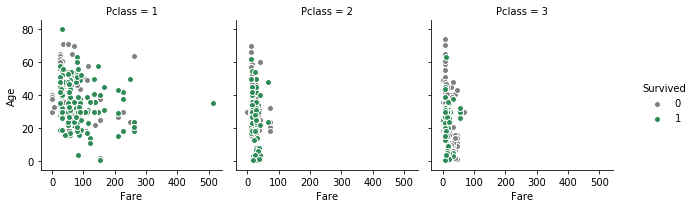

In [3]:
g = sns.FacetGrid(df, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

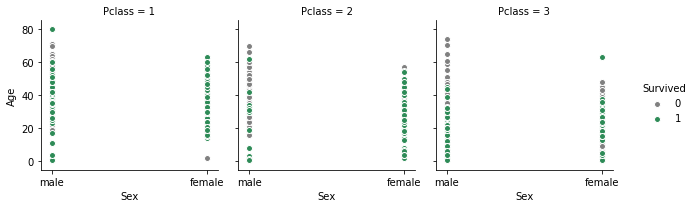

In [4]:
g = sns.FacetGrid(tmp, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"})
g=g.map(plt.scatter, "Sex", "Age",edgecolor="w").add_legend();

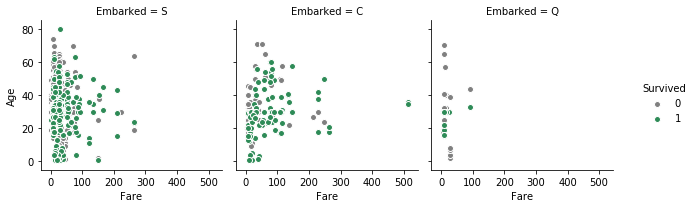

In [5]:
g = sns.FacetGrid(tmp, hue="Survived", col="Embarked", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

/Users/maxence/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/maxence/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


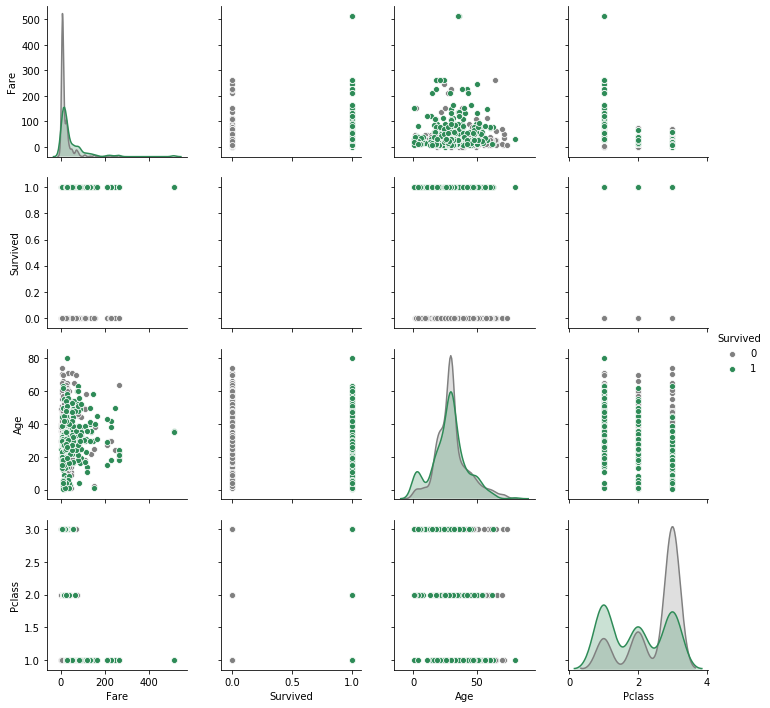

In [6]:
sns.pairplot(data=df[["Fare","Survived","Age","Pclass"]],
             hue="Survived", palette={1:"seagreen", 0:"gray"}, dropna=True);

# Building my own Regression Class

In [7]:
class logistic_regression_from_scratch():
    
    def __init__(self, X, y, alpha=0.1, epsilon=1e-5, n_iter=1000):
        
        self.m = len(y)
        self.X = np.hstack((np.ones((self.m, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))
        self.y = y
        self.alpha = alpha
        self.epsilon = epsilon
        self.n_iter = n_iter
        self.n_features = np.size(X, 1)
        self.theta = np.zeros((self.n_features + 1, 1))
        
    def sigmoid(self, X):
        
        return 1 / (1 + np.exp(-X))
        
        
    def cost_function(self):
        
        h = self.sigmoid(self.X @ self.theta)
        cost = (1/self.m)*(((-self.y).T @ np.log(h + self.epsilon))-((1-self.y).T @ np.log(1-h + self.epsilon)))
        return cost
    
    
    def fit(self):
        
        J_history = np.zeros((self.n_iter,1))

        for i in range(self.n_iter):
            self.theta = self.theta - (self.alpha/self.m) * self.X.T @ (self.sigmoid(self.X @ self.theta) - self.y)
            J_history[i] = self.cost_function()

        plt.plot(range(len(J_history)), J_history, 'r')
        plt.title("Convergence Graph of Cost Function")
        plt.xlabel("Number of Iterations")
        plt.ylabel("Cost")
        plt.show()# Testing our models against Sckit Learn
        
        return self
    

    def train_accuracy_score(self):

        X = self.X
        y = self.y

        y_pred = self.predict(X)
        train_accuracy_score = float(sum(y_pred == y))/ float(len(y))

        return train_accuracy_score
    
    
    def test_accuracy_score(self, X, y):
        
        n_samples = np.size(X, 0)
        X = np.hstack((np.ones((n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))
        
        y_pred = self.predict(X)
        test_accuracy_score = float(sum(y_pred == y))/ float(len(y))

        return test_accuracy_score
    
    
    def predict(self, X):
        
        return np.round(self.sigmoid(X @ self.theta))

# Testing our model against Sckit Learn

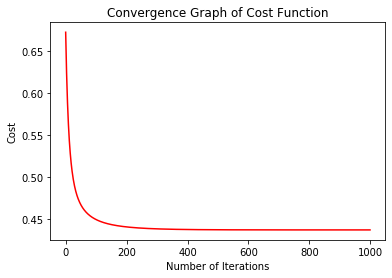

/Users/maxence/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maxence/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Scratch Implementation,Sklearn's Implementation
Training Accuracy,0.801136,0.805398
Test Accuracy,0.785311,0.785311


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df.drop(columns="Survived")
y = df["Survived"]
y = y[:,np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scratch_model = logistic_regression_from_scratch(X_train, y_train, n_iter=1000).fit()
sklearn_regressor = LogisticRegression().fit(X_train, y_train)

scratch_train_accuracy = scratch_model.train_accuracy_score()
sklearn_train_accuracy = sklearn_regressor.score(X_train, y_train)

scratch_test_accuracy = scratch_model.test_accuracy_score(X_test, y_test)
sklearn_test_accuracy = sklearn_regressor.score(X_test, y_test)

pd.DataFrame([[scratch_train_accuracy, sklearn_train_accuracy],
              [scratch_test_accuracy, sklearn_test_accuracy]],
             ['Training Accuracy', 'Test Accuracy'],    
             ['Scratch Implementation', 'Sklearn\'s Implementation'])